In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [46]:
# upload dataset
car_dataset = pd.read_csv(r'D:\AI\cardataset.csv')

In [47]:
# melihat dataset
car_dataset.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,X3,2017,15500,Manual,74907,Diesel,145,52.3,2.0
1,X3,2016,15500,Automatic,77823,Diesel,125,54.3,2.0
2,X3,2017,22000,Automatic,19057,Diesel,145,54.3,2.0
3,X3,2015,17400,Automatic,50316,Diesel,200,47.9,3.0
4,X3,2017,18000,Automatic,74852,Diesel,150,47.1,3.0


In [48]:
# Cek jumlah data pada dataset
car_dataset.shape

(470, 9)

In [49]:
#Cek apakah ada dataset yang bernilai null
car_dataset.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [50]:
# membuat variabel prediksi yang berisi data jarak tempuh dan variabel respon yang berisi data harga
X = car_dataset['mileage'].values
Y = car_dataset['price'].values

In [51]:
# fungsi untuk split dataset menjadi data train dan data test
def split_data(X,y,test_size=0.2,random_state=0):
    np.random.seed(random_state)                 
    indices = np.random.permutation(len(X))      #Shuffle indeks
    data_test_size = int(X.shape[0] * test_size)  #Set ukuran data test

    #Membagi data dari features mileage dan price ke data train dan data test
    train_indices = indices[data_test_size:]
    test_indices = indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

In [52]:
#Membagi dataset menjadi data train dan data test
X_train, Y_train, X_test, Y_test = split_data(X,Y)

In [53]:
#mencari rata-rata varibel prediksi dan variabel respon data train
mean_x = np.mean(X_train)
mean_y = np.mean(Y_train)

In [54]:
#membuat variabel untuk mencari persamaan regresi
n = len(X_train)
XY_sum = 0
Y2_sum = 0
Y_sum = 0
X2_sum = 0
X_sum = 0

In [55]:
#mencari nilai a dan b sebagai Y-intercept dan slope
for i in range(n):
    XY_sum += X_train[i]*Y_train[i]
    Y_sum += Y_train[i]
    Y2_sum += Y_train[i]**2
    X_sum += X_train[i]
    X2_sum += X_train[i]**2
a = (Y_sum*X2_sum - X_sum*XY_sum)/(n*X2_sum - X_sum**2)
b = (n*XY_sum - X_sum*Y_sum)/(n*X2_sum - X_sum**2)

In [56]:
print (f'b = {b} \na = {a}')

b = -0.3114647338617002 
a = 34327.953993933756


In [57]:
#membuat persamaan regresi dan mencari nilai rata-rata harga prediksi
x = np.linspace (np.min(X_train), np.max(X_train))
y = a + b * x
mean_yp = np.mean(a + b * X_train)

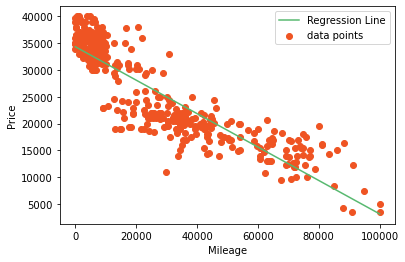

In [58]:
#plot data train dan regresi linear dari data train
plt.plot(x, y, color='#58b970', label='Regression Line')
plt.scatter(X_train, Y_train, c='#ef5423', label='data points')

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [59]:
#correlation testing
r = (X_sum*Y_sum - n*XY_sum)/(math.sqrt(n*X2_sum-X_sum**2)*math.sqrt(n*Y2_sum-Y_sum**2))
print(r)

0.890927741396777


In [60]:
#coeficient of determination
SSR = 0
SST = 0
for i in range(len(X_train)):
  SST += (Y_train[i] - mean_y) ** 2
  SSR += ((a + b * X_train[i]) - mean_yp)** 2
r2 = SSR/SST
print(r2)

0.793752240390363


In [61]:
#mencari rata-rata variabel respon data test
mean_y_test = np.mean(Y_test)

In [62]:
#mencari harga prediksi data test dan rata rata harga prediksinya
Y_pred = a + b * X_test
mean_ypred = np.mean(Y_pred)

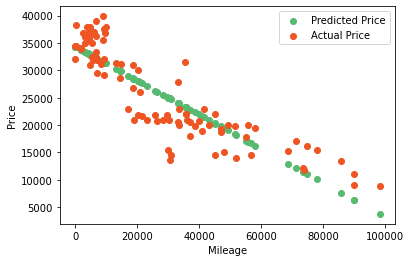

In [63]:
#plot harga sebenarnya dari data train dan harga prediksinya
plt.scatter(X_test, Y_pred, color='#58b970', label='Predicted Price')
plt.scatter(X_test, Y_test, c='#ef5423', label='Actual Price')

plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend()
plt.show()

In [64]:
#coefficient of determination 
SSR = 0
SST = 0 
for i in range(len(X_test)):
  SST+= (Y_test[i] - mean_y_test) ** 2
  SSR += ((a + b * X_test[i]) - mean_ypred) ** 2
r2_test = SSR/SST
print(r2_test)

0.787603881865379


In [65]:
#mean square error
for i in range(len(X_test)):
    SE = (Y_test[i] - (a + b * X_test[i]))**2
MSE = SE/len(X_test)
print(MSE)

11717.879154111553
